**🎬 MOVIE RATING PREDICTION 📊**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

 📥  Load the Dataset

In [9]:
from google.colab import files
uploaded=files.upload()


Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [10]:
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1', low_memory=False)


📊 Exploratory Data Analysis (EDA)

In [11]:
data.shape

(15509, 10)

In [12]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


📊 Data Visualization

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


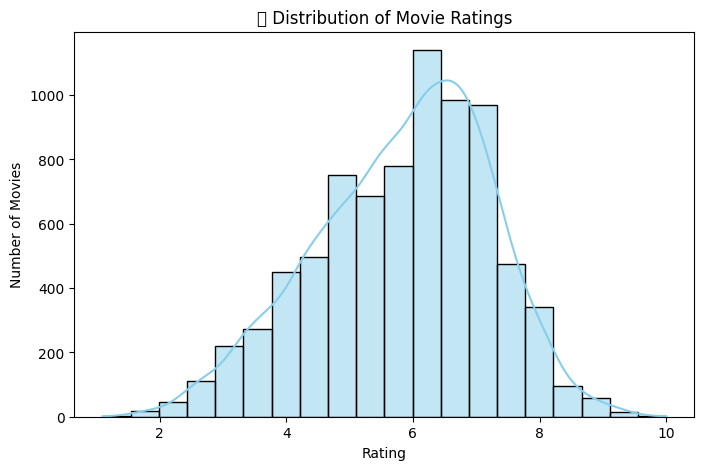

In [15]:
# Distribution of Movie Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
plt.title("⭐ Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

/tmp/ipython-input-4036272471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


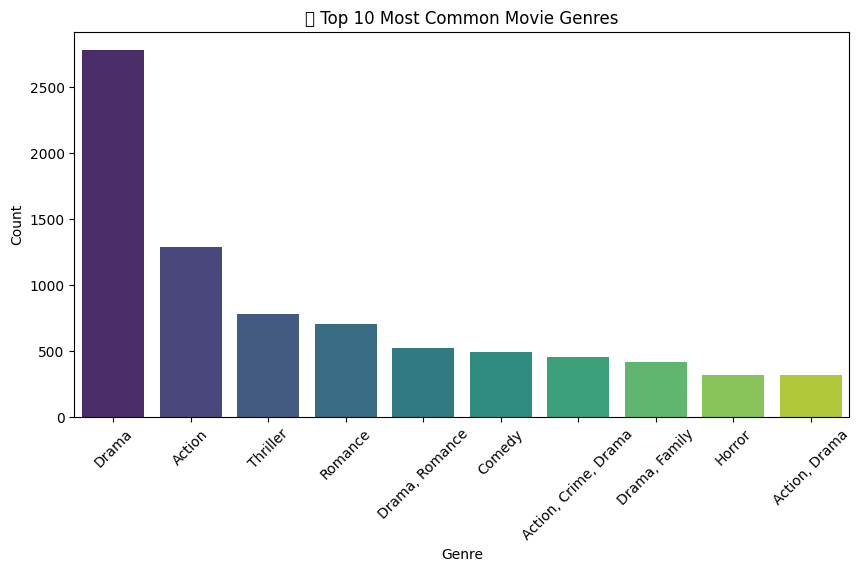

In [17]:
# 2️⃣ Top 10 Most Common Genres
plt.figure(figsize=(10, 5))
top_genres = data['Genre'].value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.title("🎬 Top 10 Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

🧹 Data Preprocessing

In [18]:
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [19]:
(data.isnull().sum()/len(data))*100

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [20]:
data.dropna(subset=['Rating'], inplace=True)

In [21]:
data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)

In [22]:
data['Votes'] = data['Votes'].str.replace(',', '', regex=False)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

In [23]:
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

In [24]:
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numerical_cols = ['Year', 'Duration', 'Votes']

In [25]:
# Fill missing categorical values with 'Unknown'
for col in categorical_cols:
    data[col] = data[col].fillna('Unknown')

In [26]:
# Fill missing numerical values with column median
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

In [27]:
X = data[categorical_cols + numerical_cols]
y = data['Rating']

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', max_categories=50), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as-is
)

In [29]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

🧠  Model Training

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                max_categories=50),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [33]:
y_pred = model.predict(X_test)

📈 Model Evaluation

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [36]:
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.8603395808281225
Root Mean Squared Error (RMSE): 1.142737617121745
R² Score: 0.29760768374771895
